In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv('obesity_train.csv')

In [3]:
test= pd.read_csv('test.csv')

In [4]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [9]:
objects = []
for obj in train.columns:
    if train[obj].dtype == 'object':
        objects.append(obj)

objects

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [10]:
for obj in objects:
    print(f"{obj} data has {train[obj].nunique()} types of values.")
    print(train[obj].value_counts(), "\n")

Gender data has 2 types of values.
Gender
Female    10422
Male      10336
Name: count, dtype: int64 

family_history_with_overweight data has 2 types of values.
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64 

FAVC data has 2 types of values.
FAVC
yes    18982
no      1776
Name: count, dtype: int64 

CAEC data has 4 types of values.
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64 

SMOKE data has 2 types of values.
SMOKE
no     20513
yes      245
Name: count, dtype: int64 

SCC data has 2 types of values.
SCC
no     20071
yes      687
Name: count, dtype: int64 

CALC data has 3 types of values.
CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64 

MTRANS data has 5 types of values.
MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: cou

In [11]:
test_objects = []
for obj in test.columns:
    if train[obj].dtype == 'object':
        test_objects.append(obj)

test_objects

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [12]:
for obj in test_objects:
    print(f"{obj} data has {test[obj].nunique()} types of values.")
    print(test[obj].value_counts(), "\n")

Gender data has 2 types of values.
Gender
Female    6965
Male      6875
Name: count, dtype: int64 

family_history_with_overweight data has 2 types of values.
family_history_with_overweight
yes    11384
no      2456
Name: count, dtype: int64 

FAVC data has 2 types of values.
FAVC
yes    12583
no      1257
Name: count, dtype: int64 

CAEC data has 4 types of values.
CAEC
Sometimes     11689
Frequently     1617
Always          359
no              175
Name: count, dtype: int64 

SMOKE data has 2 types of values.
SMOKE
no     13660
yes      180
Name: count, dtype: int64 

SCC data has 2 types of values.
SCC
no     13376
yes      464
Name: count, dtype: int64 

CALC data has 4 types of values.
CALC
Sometimes     9979
no            3513
Frequently     346
Always           2
Name: count, dtype: int64 

MTRANS data has 5 types of values.
MTRANS
Public_Transportation    11111
Automobile                2405
Walking                    280
Bike                        25
Motorbike                 

C:\Users\vaish\AppData\Local\Temp\ipykernel_20068\3710090864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=train,order=order, palette='Set2')


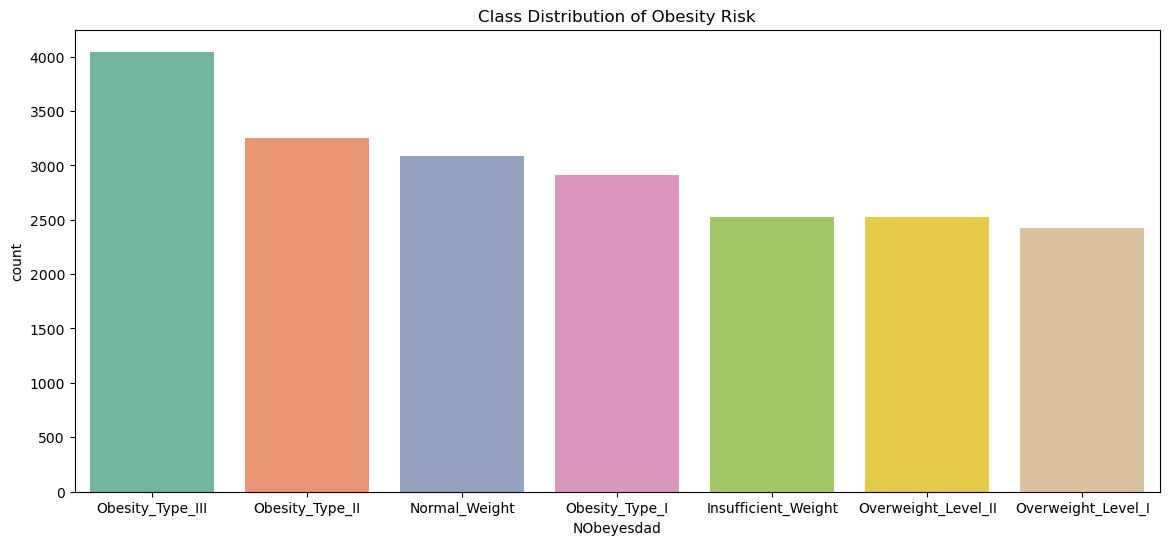

In [13]:
import matplotlib.pyplot as plt

order = train['NObeyesdad'].value_counts().index
plt.figure(figsize=(14, 6))
sns.countplot(x='NObeyesdad', data=train,order=order, palette='Set2')
plt.title('Class Distribution of Obesity Risk')
plt.show()

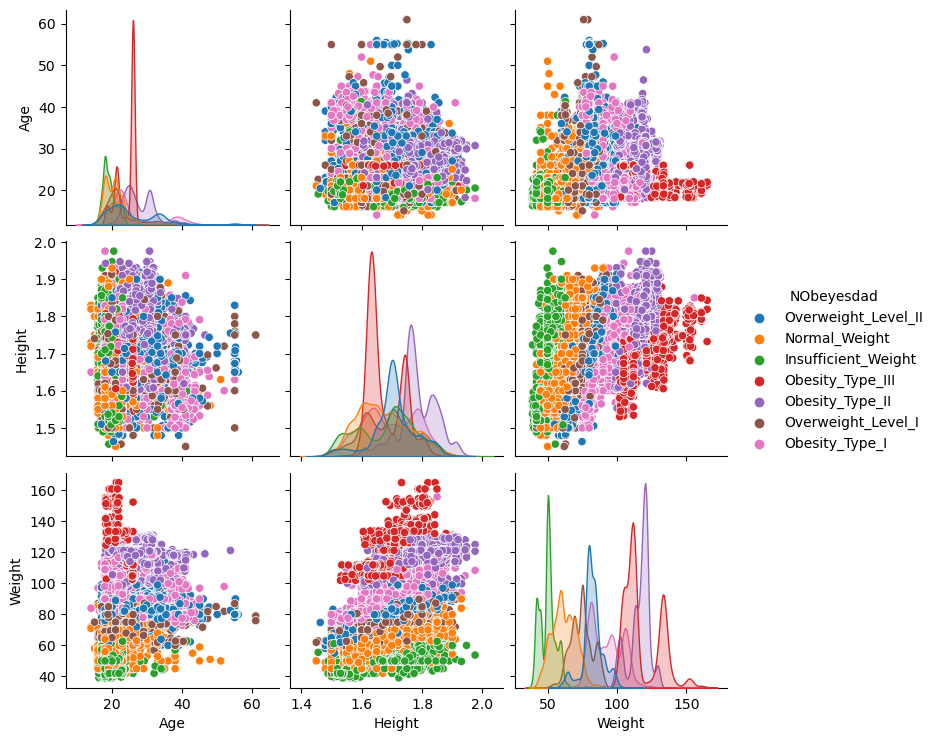

In [14]:
sns.pairplot(train, hue='NObeyesdad', vars=['Age', 'Height','Weight'])   
plt.show()

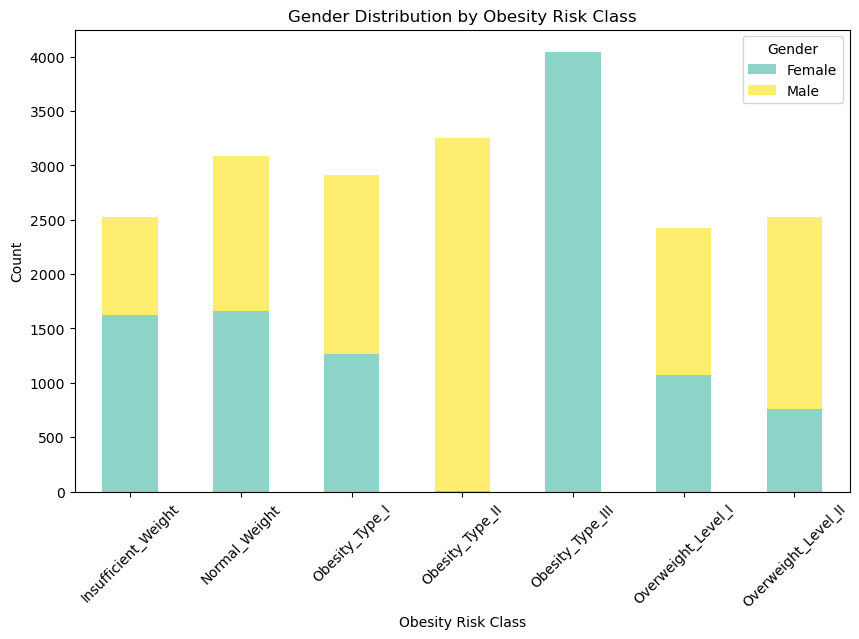

In [15]:
gender_target_counts = train.groupby(['NObeyesdad', 'Gender']).size().unstack()
gender_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Gender Distribution by Obesity Risk Class')
plt.xlabel('Obesity Risk Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
matrix=train.corr()
print(matrix)

              id       Age    Height    Weight      FCVC       NCP      CH2O  \
id      1.000000  0.008660  0.010991  0.013732  0.000867 -0.001691  0.007710   
Age     0.008660  1.000000  0.016653  0.331638  0.054800 -0.049591 -0.000635   
Height  0.010991  0.016653  1.000000  0.416523 -0.076302  0.192351  0.180655   
Weight  0.013732  0.331638  0.416523  1.000000  0.246588  0.096381  0.319383   
FCVC    0.000867  0.054800 -0.076302  0.246588  1.000000  0.113884  0.101857   
NCP    -0.001691 -0.049591  0.192351  0.096381  0.113884  1.000000  0.082255   
CH2O    0.007710 -0.000635  0.180655  0.319383  0.101857  0.082255  1.000000   
FAF     0.016030 -0.205918  0.292576 -0.086866 -0.091712  0.101497  0.078984   
TUE     0.006933 -0.292343  0.069942 -0.089590 -0.152530  0.066190 -0.015324   
BMI     0.011346  0.362730  0.101067  0.942096  0.299589  0.049532  0.295532   

             FAF       TUE       BMI  
id      0.016030  0.006933  0.011346  
Age    -0.205918 -0.292343  0.362730  
He

C:\Users\vaish\AppData\Local\Temp\ipykernel_18260\2469059975.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix=train.corr()


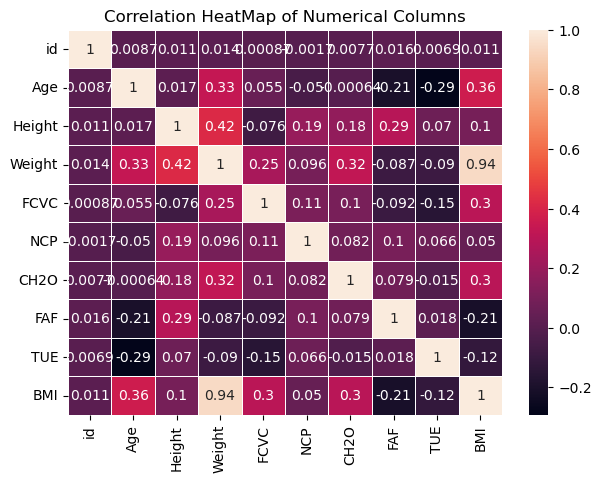

In [24]:
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True, linewidths=0.5)
plt.title('Correlation HeatMap of Numerical Columns')
plt.show()

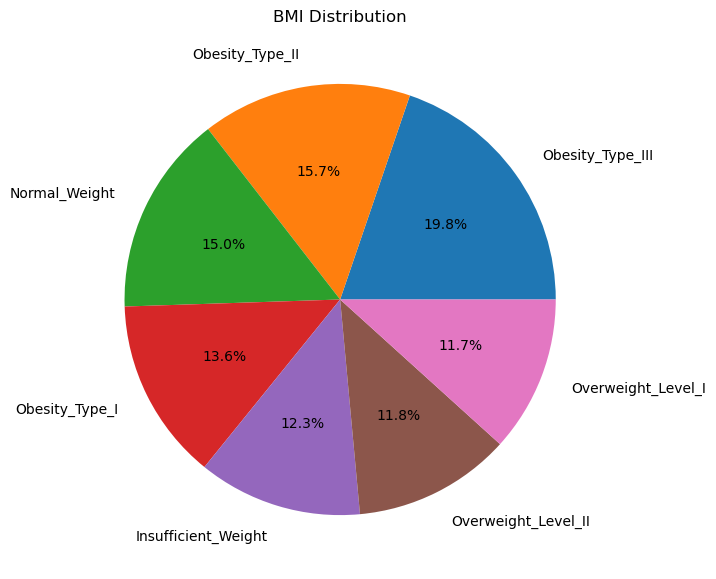

In [25]:
plt.figure(figsize=(15, 7))
values = train['NObeyesdad'].value_counts().values
indices = train['NObeyesdad'].value_counts().index
plt.pie(values, 
        labels=indices, 
        autopct="%0.1f%%", 
        labeldistance=1.15)
plt.title(f"{col} Distribution")
plt.show()

In [13]:
submission=pd.read_csv('sample_submission_obesity.csv')

In [14]:
X_encoded= train.copy()

for col in objects:
    le = LabelEncoder ()
    X_encoded[col]=le.fit_transform(X_encoded[col])

In [15]:
X_encoded.head(2)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.66995,1,1,2.0,2.983297,2,0,2.763573,0,0.0,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.00000,1,1,2.0,3.000000,1,0,2.000000,0,1.0,1.000000,2,0,1


In [16]:
train=X_encoded.copy()

In [17]:
for df in [train, test]:
    df['BMI'] = df['Weight']/df['Height']**2

In [18]:
int=train.select_dtypes(include='float').columns
print(int)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI'], dtype='object')


In [19]:
def remove_zscore_outliers(df, col, threshold=3):
    m = np.mean(df[col])
    sd = np.std(df[col])
    z_scores = (df[col] - m) / sd
    return df[np.abs(z_scores) <= threshold]

cols = int
train_ = train.copy()
for col in cols:
    train_ = remove_zscore_outliers(train_, col)
train = train_.copy()
train.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6,28.259565
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1,23.422091
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0,17.126706


In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

In [21]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, drop='first', dtype='int'), ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']),
    ('tnf2', OrdinalEncoder(dtype='int'), ['CAEC', 'CALC']),
    ('tnf3', StandardScaler(), int)
], remainder='passthrough')

In [22]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
12410,12410,0,32.290160,1.640688,46.655622,1,1,3.000000,3.566082,1,0,2.170225,0,1.078719,0.000000,2,3,0
7918,7918,1,29.246269,1.909188,129.349471,1,1,2.959658,3.000000,2,0,1.983649,0,1.879818,0.000000,1,3,3
17418,17418,0,21.682367,1.746411,133.783955,1,1,3.000000,3.000000,2,0,2.864933,0,1.488090,0.893514,1,3,4
19417,19417,0,20.871667,1.806710,54.835576,1,1,3.000000,3.000000,2,0,2.180566,0,2.000000,1.000000,2,3,0
14837,14837,0,19.833682,1.700020,49.650897,0,1,2.214980,3.000000,2,0,1.000000,0,1.194898,1.000000,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11442,11442,0,19.979810,1.716497,45.000000,0,1,3.000000,3.000000,1,0,2.847264,0,1.259550,0.000000,1,3,0
12133,12133,1,28.712995,1.665585,98.661760,1,1,2.958010,2.434347,2,0,1.000000,0,1.076720,0.000000,2,3,3
5468,5468,1,27.558801,1.877732,87.344156,0,1,2.333610,3.000000,2,0,2.638164,0,2.000000,0.972054,1,0,5
877,877,0,26.000000,1.624390,111.004920,1,1,3.000000,3.000000,2,0,2.704315,0,0.000000,0.322666,1,3,4


In [24]:
from sklearn.metrics import accuracy_score

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#import lightgbm as lgb

def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    #lgbm = LGBMClassifier(verbose=-1)  

    algos = [g, b, l, d, rf, h, k]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier'] 

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Prepare a DataFrame to store results
    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    labels = sorted(y["NObeyesdad"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    # Sort results by accuracy
    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues")
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]

In [25]:
x=train.drop(['id','NObeyesdad'],axis=1)
y=train[['NObeyesdad']]


In [26]:
x=pd.get_dummies(x,drop_first=True)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the numb

Confusion Matrix of Gradient Boosting Classifier


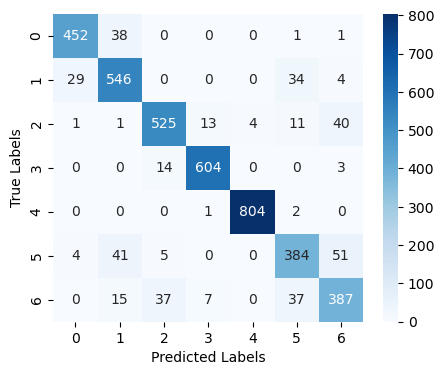

Confusion Matrix of Random Forest Classifier


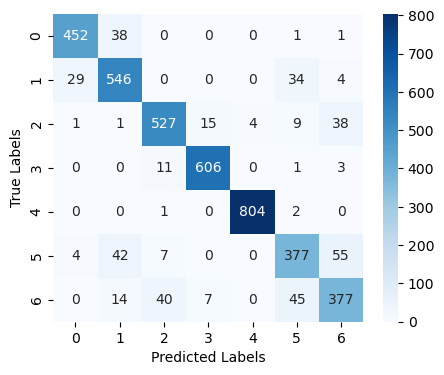

Confusion Matrix of KNeighbors Classifier


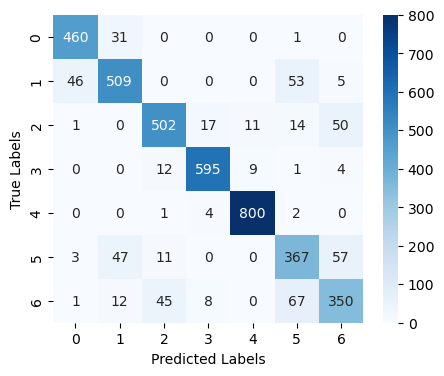

Confusion Matrix of Decision Tree Classifier


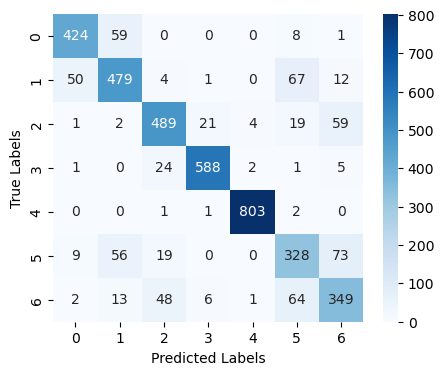

Confusion Matrix of Gaussian NB


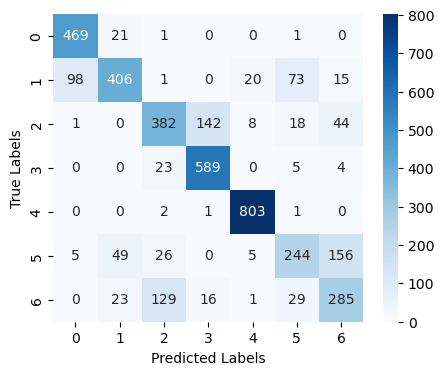

Confusion Matrix of Logistic Regression


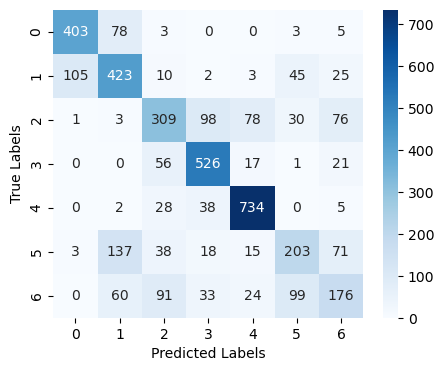

Confusion Matrix of Bernoulli NB


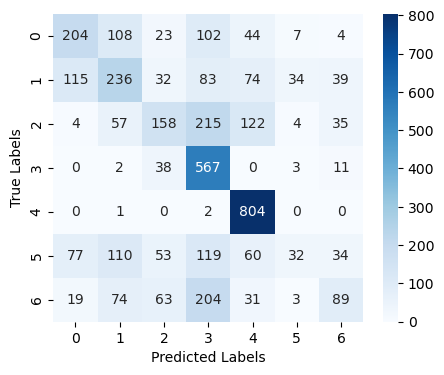

Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       492
           1       0.85      0.89      0.87       613
           2       0.90      0.88      0.89       595
           3       0.97      0.97      0.97       621
           4       1.00      1.00      1.00       807
           5       0.82      0.79      0.81       485
           6       0.80      0.80      0.80       483

    accuracy                           0.90      4096
   macro avg       0.89      0.89      0.89      4096
weighted avg       0.90      0.90      0.90      4096

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       492
           1       0.85      0.89      0.87       613
           2       0.90      0.89      0.89       595
           3       0.96      0.98      0.97       621
           4       1.00   

,Accuracy Score
Gradient Boosting Classifier,0.903809
Random Forest Classifier,0.900635
KNeighbors Classifier,0.874756
Decision Tree Classifier,0.844727
Gaussian NB,0.775879
Logistic Regression,0.677246
Bernoulli NB,0.510254


In [41]:
classification_algo(x,y,confusion_mtr=True,classification_rpt=True)

In [ ]:
rl_test_encoded_fixed = rl_test_encoded.drop(columns=['id'])

# Predict using XGBoost
test_preds = xgb_model.predict(rl_test_encoded_fixed)

# Decode to original class names
test_preds_labels = target_encoder.inverse_transform(test_preds)

# Create submission file
submission = pd.DataFrame({
    'id': rl_test['id'],  # keep original IDs for Kaggle
    'NObeyesdad': test_preds_labels
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved: submission.csv")
submission.head()
